# Scrapping

In [ ]:
import requests

In [ ]:
!pip install watermark -q

In [ ]:
!python -m spacy download es_core_news_lg -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 3.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
from bs4 import BeautifulSoup

### Scrapping

In [ ]:
url = "https://www.infobae.com/economia/2025/04/07/con-fuertes-caidas-los-mercados-de-futuros-de-eeuu-confirman-temores-de-un-lunes-negro/"

In [ ]:
contenido = requests.get(url).text

In [ ]:
soup = BeautifulSoup(contenido, "html.parser")

In [ ]:
titulo = soup.find("h1")
print(f"Título de la nota:\n'{titulo.text}'")

Título de la nota:
'Con fuertes caídas, los mercados de futuros de EEUU confirman temores a un “lunes negro”'


In [ ]:
copete= soup.find("h2")
print(f"Copete de la nota:\n{copete.text}")

Copete de la nota:
Los principales índices de Wall Street caían entre 3,7 y 5,4%, prolongando la caída posterior a los anuncios arancelarios de Donald Trump. En Japón, el índice Nikkei abrió con una caída del 7 por ciento


In [ ]:
# Obtengo el contenido del artículo
articulo = soup.find_all("p", class_ = "paragraph")

In [ ]:
# Obtengo el texto en lista

texto_articulo = []

for articulo in articulo:
  texto_articulo.append(articulo.get_text(strip=True))
  #print(articulo.get_text(strip=True))

In [ ]:
# Uno los elementos de mi lista 'texto_articulo' en 'texto'
texto = " ".join(texto_articulo).strip()

###  Spacy

In [ ]:
texto = texto.strip()

In [ ]:
doc = nlp(texto)

In [ ]:
tokens = [token.text for token in doc] # extramos el texto en unidades --> 'tokens'
print(tokens)

['La', 'apertura', 'de', 'los', 'mercados', 'de', 'futuros', 'este', 'domingo', 'fortaleció', 'la', 'impresión', 'de', 'un', 'posible', '“', 'lunes', 'negro', '”', 'en', 'Wall', 'Street', 'y', 'las', 'principales', 'bolsas', 'mundiales', ',', 'temor', 'que', 'ya', 'había', 'prefigurado', 'lafuerte', 'caída', 'en', 'la', 'cotización', 'del', 'bitcoin', 'y', 'las', 'principales', 'criptomonedas', ',', 'que', 'también', 'cayeron', 'fuertemente', 'este', 'fin', 'de', 'semana', '.', 'El', 'Dow', 'Jones', 'industrial', 'caía', '1.405', 'puntos', ',', 'un', '3,7%', ',', 'mientras', 'el', 'S&P', '500', 'de', 'futuros', 'perdía', '4,3%', 'y', 'el', 'Nasdaq', '100', 'de', 'futuros', ',', 'más', 'orientado', 'a', 'la', 'valuación', 'de', 'las', 'empresas', 'tecnológicas', 'retrocedía', 'un', '5,4', 'por', 'ciento', '.', 'El', 'índice', 'Nikkei', ',', 'de', 'la', 'bolsa', 'japonesa', ',', 'abría', 'con', 'caídas', 'cercanas', 'al', '7%', '(', 'aunque', 'luego', 'las', 'recortaba', 'al', '3,5%', ')

In [ ]:
for token in doc:
  # Ignoramos puntuación y espacios para mayor claridad
  if not token.is_punct and not token.is_space:
    print(f"'{token.text}' -> '{token.lemma_}'")

'La' -> 'el'
'apertura' -> 'apertura'
'de' -> 'de'
'los' -> 'el'
'mercados' -> 'mercado'
'de' -> 'de'
'futuros' -> 'futuro'
'este' -> 'este'
'domingo' -> 'domingo'
'fortaleció' -> 'fortalecer'
'la' -> 'el'
'impresión' -> 'impresión'
'de' -> 'de'
'un' -> 'uno'
'posible' -> 'posible'
'lunes' -> 'lunes'
'negro' -> 'negro'
'en' -> 'en'
'Wall' -> 'Wall'
'Street' -> 'Street'
'y' -> 'y'
'las' -> 'el'
'principales' -> 'principal'
'bolsas' -> 'bolsa'
'mundiales' -> 'mundial'
'temor' -> 'temor'
'que' -> 'que'
'ya' -> 'ya'
'había' -> 'haber'
'prefigurado' -> 'prefigurar'
'lafuerte' -> 'lafuerte'
'caída' -> 'caída'
'en' -> 'en'
'la' -> 'el'
'cotización' -> 'cotización'
'del' -> 'del'
'bitcoin' -> 'bitcoin'
'y' -> 'y'
'las' -> 'el'
'principales' -> 'principal'
'criptomonedas' -> 'criptomoneda'
'que' -> 'que'
'también' -> 'también'
'cayeron' -> 'caer'
'fuertemente' -> 'fuertemente'
'este' -> 'este'
'fin' -> 'fin'
'de' -> 'de'
'semana' -> 'semana'
'El' -> 'el'
'Dow' -> 'Dow'
'Jones' -> 'Jones'
'indus

In [ ]:
# Etiquetado gramatical
for token in doc:
    if not token.is_space:
      print(f"'{token.text}' -> '{token.pos_}'({spacy.explain(token.pos_)}) -> {token.tag_}")

'La' -> 'DET'(determiner) -> DET
'apertura' -> 'NOUN'(noun) -> NOUN
'de' -> 'ADP'(adposition) -> ADP
'los' -> 'DET'(determiner) -> DET
'mercados' -> 'NOUN'(noun) -> NOUN
'de' -> 'ADP'(adposition) -> ADP
'futuros' -> 'NOUN'(noun) -> NOUN
'este' -> 'DET'(determiner) -> DET
'domingo' -> 'NOUN'(noun) -> NOUN
'fortaleció' -> 'VERB'(verb) -> VERB
'la' -> 'DET'(determiner) -> DET
'impresión' -> 'NOUN'(noun) -> NOUN
'de' -> 'ADP'(adposition) -> ADP
'un' -> 'DET'(determiner) -> DET
'posible' -> 'ADJ'(adjective) -> ADJ
'“' -> 'PUNCT'(punctuation) -> PUNCT
'lunes' -> 'NOUN'(noun) -> NOUN
'negro' -> 'NOUN'(noun) -> NOUN
'”' -> 'PUNCT'(punctuation) -> PUNCT
'en' -> 'ADP'(adposition) -> ADP
'Wall' -> 'PROPN'(proper noun) -> PROPN
'Street' -> 'PROPN'(proper noun) -> PROPN
'y' -> 'CCONJ'(coordinating conjunction) -> CCONJ
'las' -> 'DET'(determiner) -> DET
'principales' -> 'ADJ'(adjective) -> ADJ
'bolsas' -> 'NOUN'(noun) -> NOUN
'mundiales' -> 'ADJ'(adjective) -> ADJ
',' -> 'PUNCT'(punctuation) -> PUNC

In [ ]:
# Análisis de dependencia sintáctica
for token in doc:
    if not token.is_space:
      print(f"'{token.text}' -> '{token.dep_}'({spacy.explain(token.dep_)})")

'La' -> 'det'(determiner)
'apertura' -> 'nsubj'(nominal subject)
'de' -> 'case'(case marking)
'los' -> 'det'(determiner)
'mercados' -> 'nmod'(modifier of nominal)
'de' -> 'case'(case marking)
'futuros' -> 'nmod'(modifier of nominal)
'este' -> 'det'(determiner)
'domingo' -> 'nmod'(modifier of nominal)
'fortaleció' -> 'ROOT'(root)
'la' -> 'det'(determiner)
'impresión' -> 'obj'(object)
'de' -> 'case'(case marking)
'un' -> 'det'(determiner)
'posible' -> 'amod'(adjectival modifier)
'“' -> 'punct'(punctuation)
'lunes' -> 'nmod'(modifier of nominal)
'negro' -> 'compound'(compound)
'”' -> 'punct'(punctuation)
'en' -> 'case'(case marking)
'Wall' -> 'obl'(oblique nominal)
'Street' -> 'flat'(flat multiword expression)
'y' -> 'cc'(coordinating conjunction)
'las' -> 'det'(determiner)
'principales' -> 'amod'(adjectival modifier)
'bolsas' -> 'conj'(conjunct)
'mundiales' -> 'amod'(adjectival modifier)
',' -> 'punct'(punctuation)
'temor' -> 'appos'(appositional modifier)
'que' -> 'nsubj'(nominal subjec

/usr/local/lib/python3.11/dist-packages/spacy/glossary.py:20: UserWarning: [W118] Term 'expl:pass' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))
/usr/local/lib/python3.11/dist-packages/spacy/glossary.py:20: UserWarning: [W118] Term 'expl:impers' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))
/usr/local/lib/python3.11/dist-packages/spacy/glossary.py:20: UserWarning: [W118] Term 'expl:pv' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))


In [ ]:
options = {"compact": True, "bg": "#09a3d5",
           "color": "white", "font": "Source Sans Pro"}
displacy.render(doc, style="dep", options=options)

In [ ]:
# Análisis de las entidades
if doc.ents:
  print("Entidades encontradas:")
  for ent in doc.ents:
    print(f"{ent.text} -> {ent.label_}({spacy.explain(ent.label_)})")
else:
  print("No se encontraron entidades.")

Entidades encontradas:
Wall Street -> LOC(Non-GPE locations, mountain ranges, bodies of water)
lafuerte caída -> PER(Named person or family.)
El Dow Jones -> MISC(Miscellaneous entities, e.g. events, nationalities, products or works of art)
S&P -> ORG(Companies, agencies, institutions, etc.)
Nasdaq -> ORG(Companies, agencies, institutions, etc.)
El índice Nikkei -> MISC(Miscellaneous entities, e.g. events, nationalities, products or works of art)
Un indicador en ese sentido -> MISC(Miscellaneous entities, e.g. events, nationalities, products or works of art)
Trump -> PER(Named person or family.)
en Estados Unidos -> LOC(Non-GPE locations, mountain ranges, bodies of water)
la Casa Blanca -> LOC(Non-GPE locations, mountain ranges, bodies of water)
Dow Jones -> MISC(Miscellaneous entities, e.g. events, nationalities, products or works of art)
El S&P 500 -> MISC(Miscellaneous entities, e.g. events, nationalities, products or works of art)
Viernes -> ORG(Companies, agencies, institutions, e

In [ ]:
displacy.render(doc,style='ent',jupyter=True,options={'distance':200})

In [ ]:
palabras_clave = []

In [ ]:
for token in doc:
    if token.is_alpha and not token.is_stop:
      # Normalización: Obtener lema y convertir a minúsculas
      palabras_clave.append(token.lemma_.lower())

print(f"Se extrajeron {len(palabras_clave)} palabras clave (lemas, sin stop words).")
# Ejemplo de las primeras palabras extraídas:
print(f"Ejemplo: {palabras_clave[:15]}")

Se extrajeron 303 palabras clave (lemas, sin stop words).
Ejemplo: ['apertura', 'mercado', 'futuro', 'domingo', 'fortalecer', 'impresión', 'lunes', 'negro', 'wall', 'street', 'principal', 'bolsa', 'mundial', 'temor', 'prefigurar']


In [ ]:
frecuencia_palabras = Counter(palabras_clave)

In [ ]:
N = 15
palabras_mas_comunes = frecuencia_palabras.most_common(N)

In [ ]:
for palabra, frecuencia in palabras_mas_comunes:
    print(f"• '{palabra}' : {frecuencia}")

• 'caída' : 9
• 'semana' : 8
• 'mercado' : 5
• 'trump' : 5
• 'arancel' : 5
• 'futuro' : 4
• 'índice' : 4
• 'económico' : 4
• 'principal' : 3
• 'bolsa' : 3
• 'mundial' : 3
• 'caer' : 3
• 'recesión' : 3
• 'eeuu' : 3
• 'año' : 3


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
wordcloud_generator = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='inferno',
    max_words=15,
    stopwords=None,
    collocations=False

).generate_from_frequencies(frecuencia_palabras)

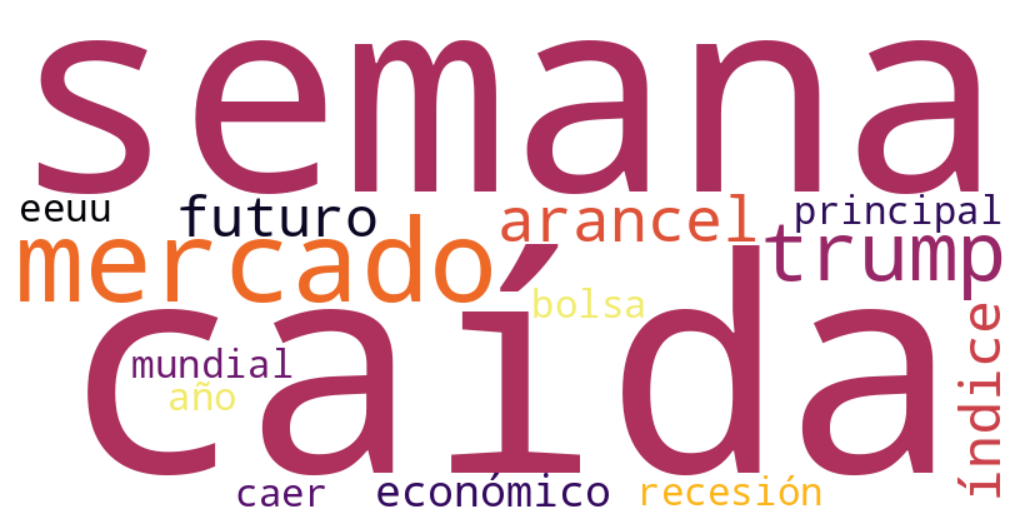

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_generator, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
wordcloud_generator.to_file("nube_de_palabras_caso2.jpg") #guardo la imagen